In [1]:
import numpy as np
import scipy.special
import os

#LOCAL imports
from arcmodelling_IDMC import artificial_data_gen as adgen
from arcmodelling_IDMC import tools
from arcmodelling_IDMC import model_functions as mf

# 3. Generate final datasets for sampling

## Default parameters 

In [3]:
#parameters defined earlier
N=100

dataset_path='N'+str(N)
Ivol_noiseless_path=os.path.join(dataset_path, 'Ivol_01_noiseless_for_masking.npy')
centerdist_vol_path=os.path.join(dataset_path, 'centerdist_vol.npy')
volumes_path=os.path.join(dataset_path,'volumes', '')
datasets_path = os.path.join(dataset_path,'datasets', '')

#new parameters
wb = 4

sigma_n = 500.
I = [26000., 31000., 42000.]
sigma_b=1.26

In [4]:

if not os.path.exists(volumes_path):
    os.makedirs(volumes_path)

if not os.path.exists(datasets_path):
    os.makedirs(datasets_path)


## Load data

In [5]:
Ivol_noiseless=np.load(Ivol_noiseless_path)
centerdist_vol=np.load(centerdist_vol_path)
params={'I': I,
       'sigma_b': sigma_b,
       'sigma_n': sigma_n}

## Generate noisy intensity and gradient data ( 6 volumes)

In [6]:
#create all 6 types of volumes (to get symmetric interface contributions)
adgen.generate_all_Ivols(centerdist_vol, params, volumes_path)

Volume generated, R=  42.96
Volume generated, R=  42.96
Volume generated, R=  42.96
Volume generated, R=  42.96
Volume generated, R=  42.96
Volume generated, R=  42.96


## Generate masks

In [8]:
interface_mask, interior_mask, exterior_mask = adgen.get_masks(Ivol_noiseless, params, wb)
masks=[interface_mask, interior_mask, exterior_mask]

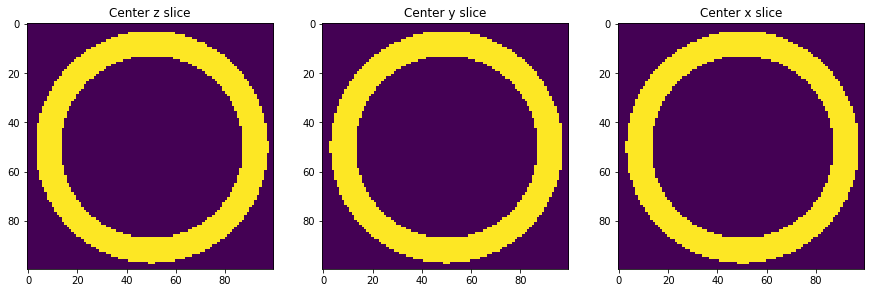

In [9]:
tools.plot_center_slices(interface_mask)

## Mask, combine and save datasets

All 6 volumes combined to get symmetric volume fractions

In [10]:
adgen.generate_all_datasets(params, volumes_path, datasets_path, masks)